In [171]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv("train.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [173]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [174]:
df.shape

(1460, 81)

### Remove the column Alley,FireplaceQu,PoolQC,Fence,MiscFeature as it is having less records in the data

In [175]:
df.drop(['Alley','FireplaceQu','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [176]:
df.shape

(1460, 76)

In [178]:
df.drop(['TotRmsAbvGrd'], axis=1,inplace=True)
df.shape

(1460, 75)

Removed TotRmsAbvGrd column as it is not useful for Analysis

In [179]:
df.RoofStyle.unique()

array(['Gable', 'Hip', 'Gambrel', 'Mansard', 'Flat', 'Shed'], dtype=object)

In [180]:
df[df.SalePrice.isnull()]
df['LotFrontage'] = df['LotFrontage'].fillna(0)
df['MasVnrArea'] = df['MasVnrArea'].fillna(0)

In [181]:
df[df.SalePrice.isnull()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [182]:
df.shape

(1460, 75)

In [183]:
df.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 75, dtype: int64

In [184]:
df[df.SalePrice.apply(lambda x:isinstance(x,float)) == True]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [185]:
df['SalePrice'].value_counts(normalize=True)

140000    0.013699
135000    0.011644
145000    0.009589
155000    0.009589
190000    0.008904
            ...   
84900     0.000685
424870    0.000685
415298    0.000685
62383     0.000685
34900     0.000685
Name: SalePrice, Length: 663, dtype: float64

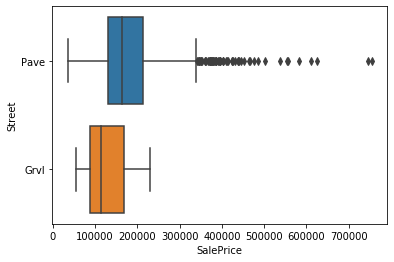

In [186]:
sns.boxplot(y='Street',x='SalePrice', data=df)
plt.show()

- In above boxplot we can infer that Mean of Pave street is equal to 75th quantile of Grvl Street
- There are some outliers but as it regards to cost seems to be not outlier

In [187]:
df.MoSold.value_counts(normalize=True)

6     0.173288
7     0.160274
5     0.139726
4     0.096575
8     0.083562
3     0.072603
10    0.060959
11    0.054110
9     0.043151
12    0.040411
1     0.039726
2     0.035616
Name: MoSold, dtype: float64

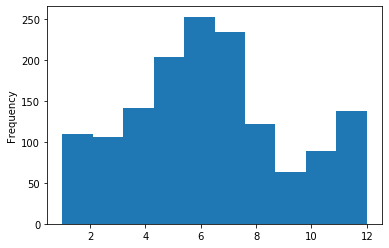

In [188]:
df.MoSold.plot.hist()
plt.show()

People showing interst to buy houses during the months Jun, Jul

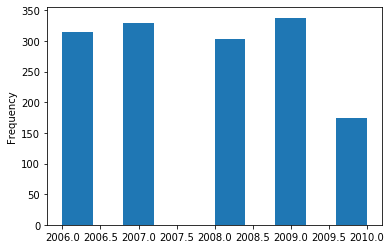

In [189]:
df.YrSold.plot.hist()
plt.show()

People has not showed must interest during the year 2010 when compared to other years, also in mid of 2007 there are no sales

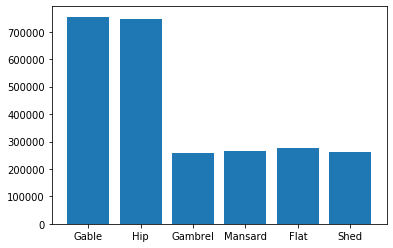

In [190]:
plt.bar(df.RoofStyle,df.SalePrice)
plt.show()

Roof Styles with Gable and Hip are lying across all the price levels where as other roof styles are in between 10000 to 20000

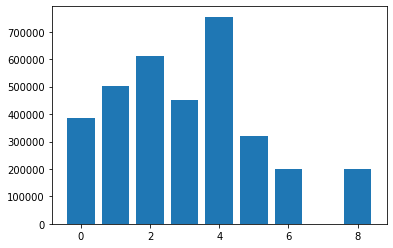

In [191]:
plt.bar(df.BedroomAbvGr,df.SalePrice)
plt.show()

Seems to be there is a outlier between saleprice and BedroomAbvGr as it is supposed to increase in the price when count of bedrooms increases

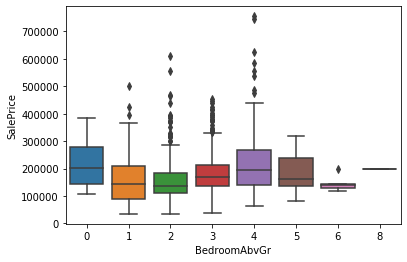

In [192]:
sns.boxplot(x='BedroomAbvGr',y='SalePrice',data=df)
plt.show()

Not sure how to deal here

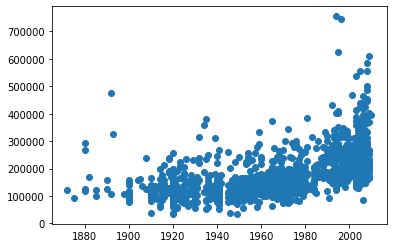

In [193]:
plt.scatter(df.YearBuilt,df.SalePrice)
plt.show()

Cost is increasing with the year

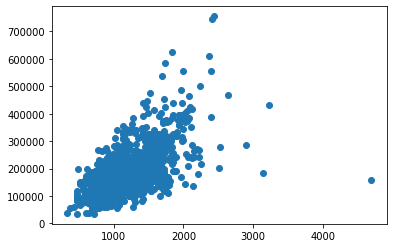

In [194]:
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.show()

In [195]:
df['1stFlrSF'].quantile([0.5,0.75,0.9,0.95,0.99])

0.50    1087.00
0.75    1391.25
0.90    1680.00
0.95    1831.25
0.99    2219.46
Name: 1stFlrSF, dtype: float64

In [196]:
df['1stFlrSF'].describe()

count    1460.000000
mean     1162.626712
std       386.587738
min       334.000000
25%       882.000000
50%      1087.000000
75%      1391.250000
max      4692.000000
Name: 1stFlrSF, dtype: float64

In [200]:
df = df[df['1stFlrSF']<2000]

Removed the records having first floor size less than 2000 sqft as scatter diagram shows it is having less price for houses having more than 2000 sqft

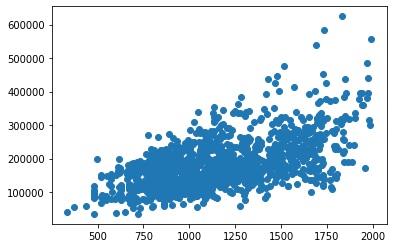

In [201]:
plt.scatter(df['1stFlrSF'],df.SalePrice)
plt.show()

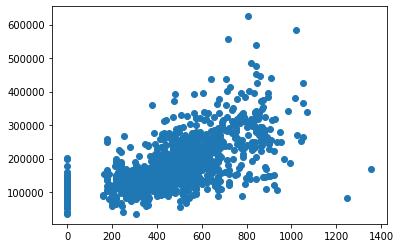

In [202]:
plt.scatter(df['GarageArea'],df['SalePrice'])
plt.show()

If there is increase in Garage Area, Price also needs to be increased but here there is different behaviour after the size of 1000sqft

In [204]:
df['GarageArea'].quantile([0.50,0.75,0.90,0.99])

0.50    473.00
0.75    576.00
0.90    738.30
0.99    945.13
Name: GarageArea, dtype: float64

So, let's consider GarageArea greater than 1000 as outlier

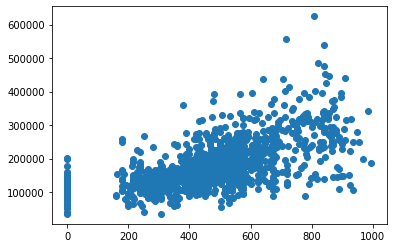

In [205]:
df = df[df['GarageArea']<=1000]
plt.scatter(df['GarageArea'],df['SalePrice'])
plt.show()

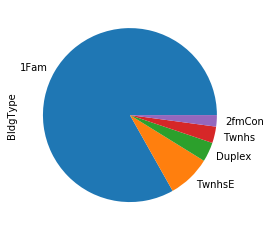

In [207]:
df['BldgType'].value_counts().plot.pie()
plt.show()

Builing type like '1Fam' are very good type to be get sold soon

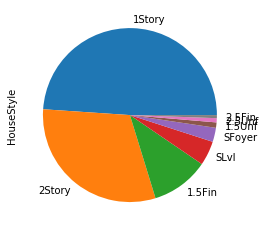

In [209]:
df['HouseStyle'].value_counts().plot.pie()
plt.show()

-- Houses with 1Story are majority part when 2Story stands next and the 1.5Fin and soon, so it is good to have more 1Story buildings

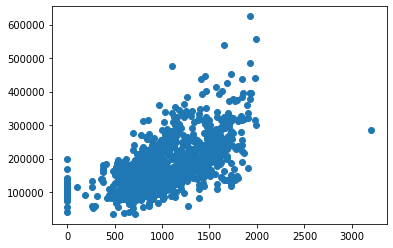

In [212]:
plt.scatter(df.TotalBsmtSF,df.SalePrice)
plt.show()

If there is increase in total basement square feet area and there is a increase in price

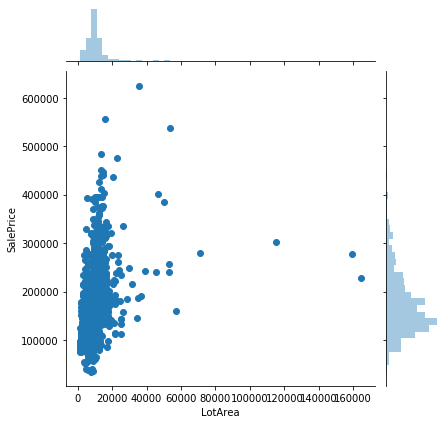

In [216]:
sns.jointplot(df.LotArea,df.SalePrice)
plt.show()

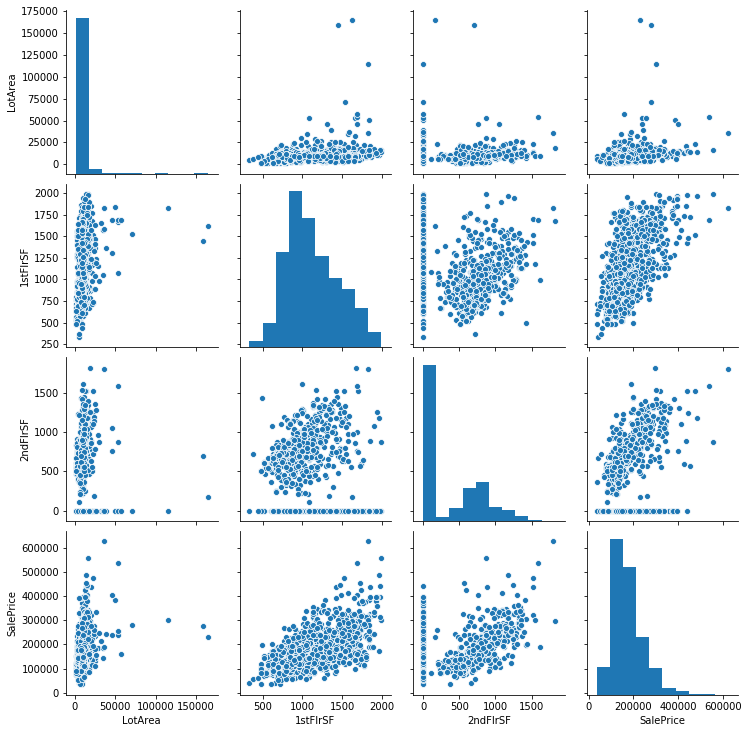

In [219]:
sns.pairplot(df[['LotArea','1stFlrSF','2ndFlrSF','SalePrice']])
plt.show()

-- There is no impact of increase in LotArea with respect to 2ndFlrSize and 1stFlrSize but only price is increasing
-- If there is 1stFloor size is increasing then 2nsFloor size ,Price increasing and vice versa